In [ ]:
import laspy
import numpy as np


def detect_trunk_points_2d(
        input_las_path: str,
        output_las_path: str,
        cell_size: float = 0.2,
        min_points_in_cell: int = 100):
    print("Reading LAS...")
    las = laspy.read(input_las_path)

    N = las.header.point_count

    x = las.x
    y = las.y

    print("Computing bounds...")
    min_x = x.min()
    min_y = y.min()

    max_x = x.max()
    max_y = y.max()

    cols = int(np.ceil((max_x - min_x) / cell_size))
    rows = int(np.ceil((max_y - min_y) / cell_size))

    print(f"Grid: {rows} x {cols} = {rows * cols} cells")

    # ===== ИНДЕКС ЯЧЕЙКИ ДЛЯ КАЖДОЙ ТОЧКИ =====
    col_idx = np.floor((x - min_x) / cell_size).astype(np.int32)
    row_idx = np.floor((y - min_y) / cell_size).astype(np.int32)

    # защита
    valid = (
        (row_idx >= 0) & (row_idx < rows) &
        (col_idx >= 0) & (col_idx < cols)
    )

    row_idx = row_idx[valid]
    col_idx = col_idx[valid]

    print("Creating flat indices...")
    flat_idx = row_idx * cols + col_idx

    print("Counting points per cell...")
    counts = np.bincount(flat_idx, minlength=rows * cols)
    return counts

In [ ]:

counts = detect_trunk_points_2d(
    input_las_path="data/test_data/non_ground.las",
    output_las_path="data/test_data/trunks.las",
    cell_size=0.2,           # 20 см на ячейку
    min_points_in_cell=80     # порог "ствола"
    )

Reading LAS...
Computing bounds...
Grid: 25 x 25 = 625 cells
Creating flat indices...
Counting points per cell...


(625,)
0.00 - 920175.00
22368.6496


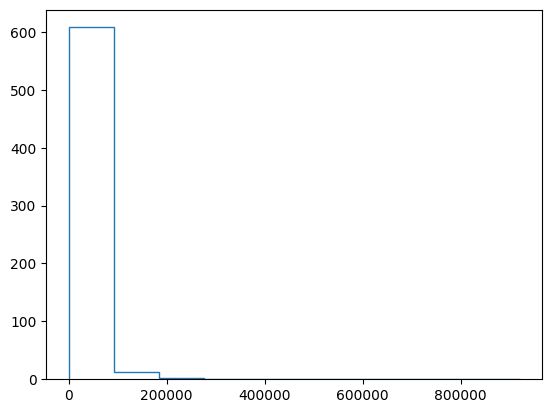

In [6]:
from matplotlib import pyplot as plt

print(counts.shape)
print(f"{counts.min():.2f} - {counts.max():.2f}")
print(counts.mean())
c, b = np.histogram(counts)
plt.stairs(c, b)

(449,)
0.00 - 19941.00
9849.391982182628


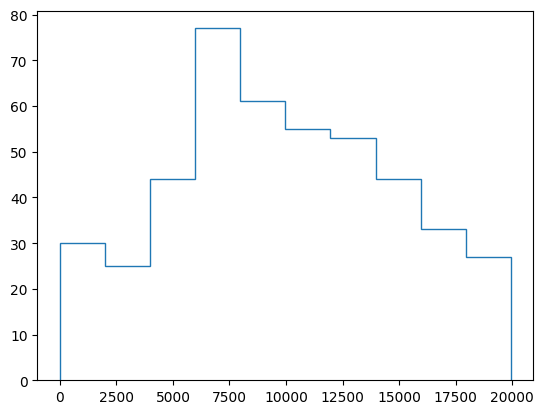

In [8]:
t1 = counts[counts < 20000]

print(t1.shape)
print(f"{t1.min():.2f} - {t1.max():.2f}")
print(t1.mean())
c, b = np.histogram(t1)
plt.stairs(c, b)